In [2]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def show(img, title='Image'):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # 不显示坐标轴
    plt.title(title) # 图像题目
    plt.show()

# threshold函数

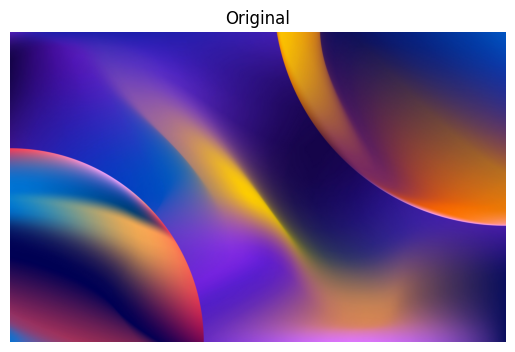

In [4]:
img = cv2.imread('images/color.jpg')
show(img, 'Original')

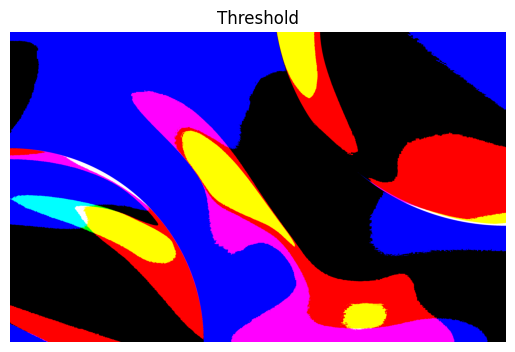

In [5]:
t, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
show(thresh, 'Threshold')

## 反二值化阈值处理

* 对于灰度值大于阈值的像素点，将其值设定为0。
* 对于灰度值小于或等于阈值的像素点，将其值设定为255。

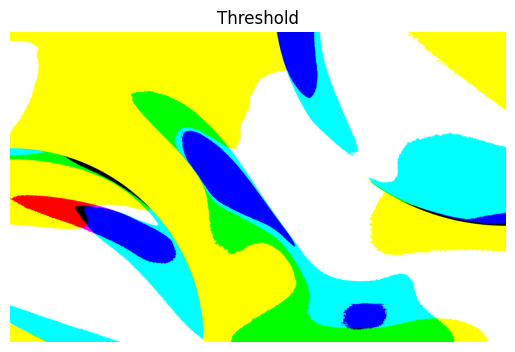

In [6]:
t, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
show(thresh, 'Threshold')

## 截断阈值化处理

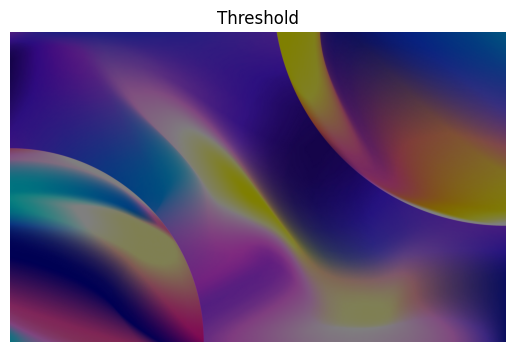

In [7]:
t, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
show(thresh, 'Threshold')

## 超阈值零处理

超阈值零处理会将图像中大于阈值的像素点的值处理为0，小于或等于该阈值的像素点的值保持不变。

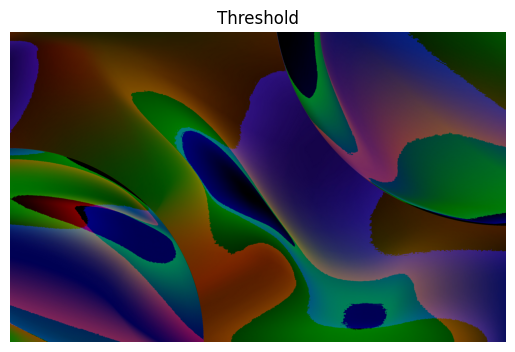

In [8]:
t, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)
show(thresh, 'Threshold')

## 低阈值零处理

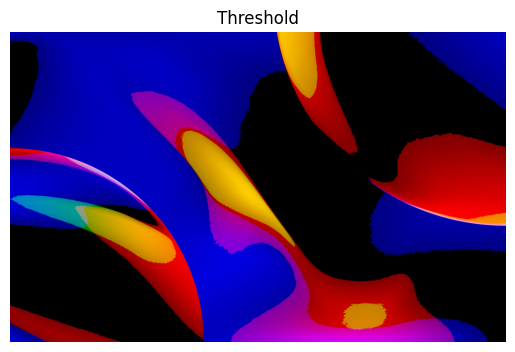

In [9]:
t, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
show(thresh, 'Threshold')

# 自适应阈值处理

在进行阈值处理时，自适应阈值处理的方式通过计算每个像素点周围临近区域的加权平均值获得阈值，并使用该阈值对当前像素点进行处理。

注意：这个方法src必须是8位单通道的图像。

自适应阈值等于每个像素由参数blockSize所指定邻域的加权平均值减去常量C。

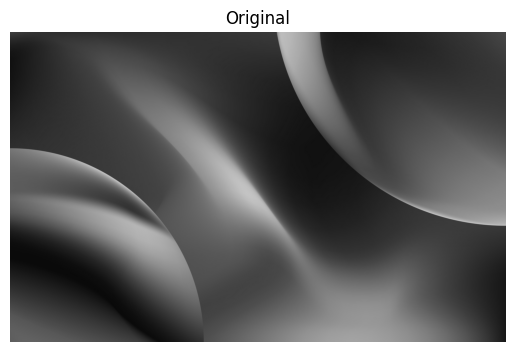

In [10]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show(img, 'Original')

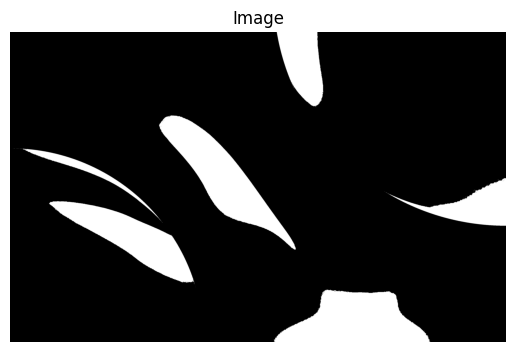

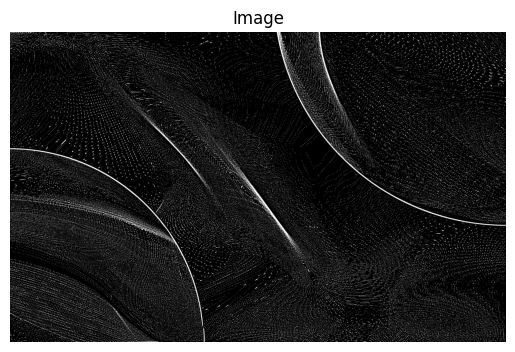

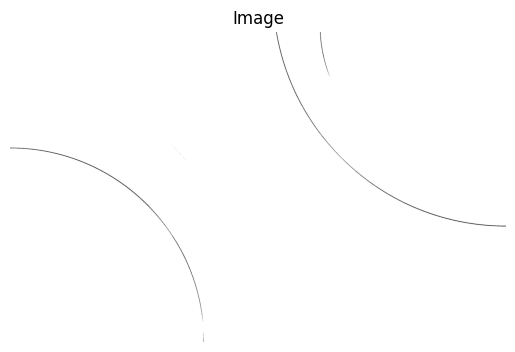

In [11]:
t, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
athdMEAN = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 0)
athdGAUSS = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 5)
show(thresh)
show(athdMEAN)
show(athdGAUSS)

# OSTU处理

Otsu方法能够根据当前图像给出最佳的类间分割阈值。简而言之，Otsu方法会遍历所有可能阈值，从而找到最佳的阈值。

需要说明的是，在使用Otsu方法时，要把阈值设为0。此时的函数cv2.threshold()会自动寻找最优阈值，并将该阈值返回。

## 对比 otsu 和 adaptiveThreshold

我的理解： ostu 是找整体的最好的阈值，adaptiveThreshold 是找的局部的最好的阈值。

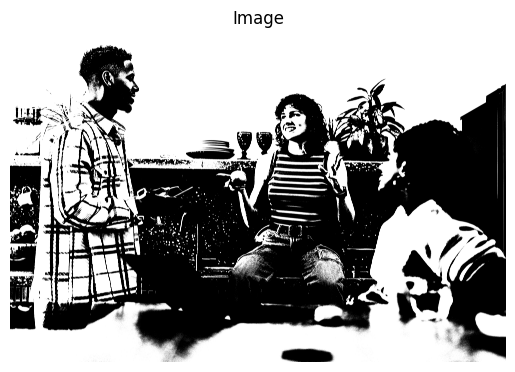

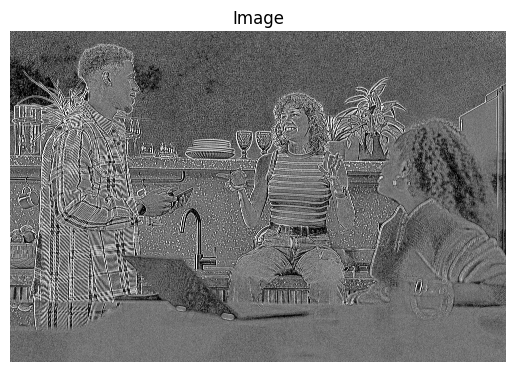

In [10]:
img = cv2.imread('images/samsung.jpg', 0)
t, ostu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
adaptive = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 0)
show(ostu)
show(adaptive)